In [32]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import wordcloud
from wordcloud.wordcloud import WordCloud
from collections import Counter

In [44]:
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings(action='once')


In [12]:
lyrics = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/output/dt_lyrics.csv')
artists = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/data/artists.csv')

In [13]:
lyrics.shape

(125704, 8)

In [14]:
lyrics.dtypes

Unnamed: 0       int64
song            object
year             int64
artist          object
genre           object
lyrics          object
id               int64
stemmedwords    object
dtype: object

In [15]:
lyrics.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...,1,stop house call home rundown grass overgrown s...
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...,2,unsure hand lead dance floor music die eyes ca...
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...,4,chris fallin fantasy threw destiny stop feelin...
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,5,touch hold hand hold somethings change somethi...


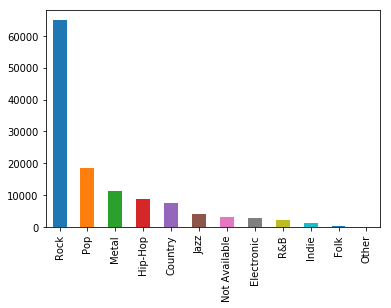

In [16]:
lyrics['genre'].value_counts().plot.bar()

In [17]:
lyrics.columns

Index(['Unnamed: 0', 'song', 'year', 'artist', 'genre', 'lyrics', 'id',
       'stemmedwords'],
      dtype='object')

In [19]:
genre_list = list(set(lyrics['genre']))
genre_list

['Metal',
 'Rock',
 'Hip-Hop',
 'Jazz',
 'Electronic',
 'R&B',
 'Indie',
 'Folk',
 'Other',
 'Country',
 'Not Available',
 'Pop']

In [20]:
keep_coulms_label = [ 'song', 'year', 'artist', 'genre', 'id', 'stemmedwords']

In [37]:
def df_genre(genre):
    """sub original lyrics dataframe by genre
    Input
    ------
        genre: different genre, a list, no duplicate variable
    Return
    ------
        dataframe that only contain rows that belong to input genre"""
    dataframe_all =  lyrics[lyrics['genre']==genre]
    return dataframe_all[keep_coulms_label]
    
def series_stemmedwords (dataframe_genre):
    """return a pandas series that only contain stemmedwords"""
    return dataframe_genre['stemmedwords']

def df_add_words(dataframe_genre):
    #https://sigdelta.com/blog/text-analysis-in-pandas/
    dataframe_genre_add = dataframe_genre.copy()
    dataframe_genre_add['words'] = dataframe_genre_add.stemmedwords.str.strip().str.split('[\W_]+')
    return dataframe_genre_add

def list_all_words(dataframe_add):
    """get a list contain all words in stemmwords
    Input
    -----
        dataframe_add : a dataframe, should be the one add words col
    Return
    ----
        a list contain every words from words col"""

    combine_list_words = list()
    for l in dataframe_add['words']:
        combine_list_words.append(l)
    combine_list_words = [val for sublist in combine_list_words for val in sublist] 
    return combine_list_words

def float_words_using(dataframe_add):
    return len(set(list_all_words(dataframe_add)))/len(list_all_words(dataframe_add))

def df_counts_words(list_words,int_common):
    """get a df with only words and counts
    Input
    ----
        list_words: a list of words that want to count,should be the output of list_all_words
        int_common: a int, the first how many words with highest freq want to show
    Return
    ------
        a dataframe that only contain words and counts, from max to min order"""
    counts = Counter(list_words)
    df_counts = pd.DataFrame(
    {'words': 
list(counts.keys()),
     'counts': 
list(counts.values())
    })
    df_counts = df_counts.sort_values('counts',ascending=False)
    if int_common is not None:
        return df_counts.iloc[0:int_common]
    return df_counts

def word_cloud_plot(list_words,int_common=None):
    #https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
    d = {}
    for a, x in df_counts_words(list_words,int_common).values:
        d[a] = x
    #convert list to string and generate
    unique_string=(" ").join(list_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()



In [38]:
def word_cloud_via_genre(genre,int_common=None):
    dataframe_genre = df_genre(genre)
    dataframe_add = df_add_words(dataframe_genre)
    list_words = list_all_words(dataframe_add)
    print(list_words)
    
    return word_cloud_plot(list_words,int_common)

SyntaxError: invalid syntax (<ipython-input-48-0950bf7915fd>, line 1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



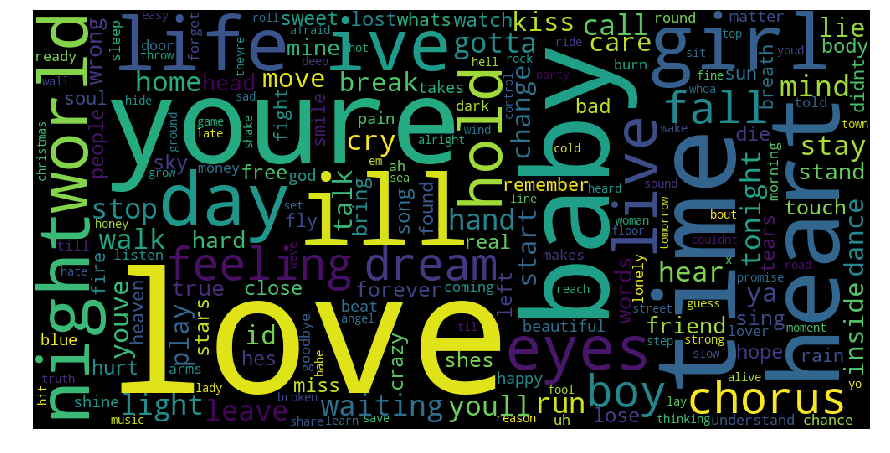

In [47]:
word_cloud_via_genre('Pop',int_common=None)
warnings.simplefilter('ignore')

In [24]:
df_add_pop = df_add_words(df_genre('Pop'))
l_pop = list_all_words(df_add_pop)